In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from google.colab.patches import cv2_imshow
import zipfile
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
path='/content/homer_bart_2'

In [17]:
zip_object=zipfile.ZipFile(file=path,mode='r')
zip_object.extractall("./")
zip_object.close()

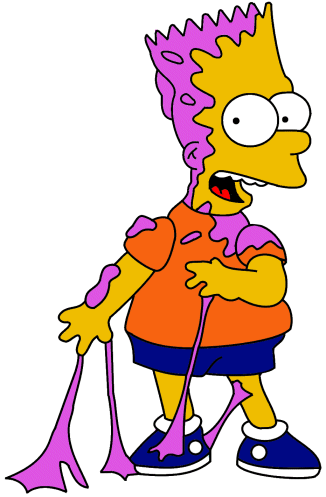

In [9]:
tf.keras.preprocessing.image.load_img('/content/homer_bart_2/test_set/bart/bart1.bmp')

In [18]:
training_gnrator=ImageDataGenerator(rescale=1./255,rotation_range=7,horizontal_flip=True,vertical_flip=True,zoom_range=0.2)

In [21]:
train_dataset=training_gnrator.flow_from_directory('/content/homer_bart_2/training_set',
                                                   target_size=(64,64),batch_size=8,class_mode='categorical'
                                                   ,shuffle=True)

Found 215 images belonging to 2 classes.


In [22]:
train_dataset.class_indices

{'bart': 0, 'homer': 1}

In [23]:
test_genrator=ImageDataGenerator(rescale=1./255)
test_dataset=test_genrator.flow_from_directory('/content/homer_bart_2/test_set',
                                              target_size=(64,64),batch_size=1,class_mode='categorical'
                                              ,shuffle=False)

Found 54 images belonging to 2 classes.


In [34]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Initialize the neural network
network = Sequential()

# First convolutional layer
network.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)))
network.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer
network.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional layer
network.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the layers
network.add(Flatten())

# Fully connected layers
network.add(Dense(units=128, activation='relu'))  # Updated units for better representation
network.add(Dense(units=64, activation='relu'))   # Added another Dense layer for better learning
network.add(Dense(units=2, activation='softmax'))

# Summary of the network
network.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 6, 6, 32)         

In [27]:
network = Sequential()
network.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
network.add(MaxPooling2D(pool_size=(2, 2)))

network.add(Conv2D(32, (3, 3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2, 2)))

network.add(Conv2D(32, (3, 3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2, 2)))

network.add(Flatten())
network.add(Dense(units=1, activation='relu'))  # Adjust units according to your task
network.add(Dense(units=1, activation='relu'))  # Adjust units according to your task
network.add(Dense(units=2, activation='softmax'))

network.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 32)         

In [35]:
network.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [37]:
history=network.fit(train_dataset,validation_data=test_dataset,epochs=50)

Epoch 1/50
27/27 [==============================] - 1s 32ms/step - loss: 0.3828 - accuracy: 0.7953 - val_loss: 0.2946 - val_accuracy: 0.8519
Epoch 2/50
27/27 [==============================] - 1s 32ms/step - loss: 0.3624 - accuracy: 0.8233 - val_loss: 0.6724 - val_accuracy: 0.6852
Epoch 3/50
27/27 [==============================] - 1s 32ms/step - loss: 0.3299 - accuracy: 0.8465 - val_loss: 0.4080 - val_accuracy: 0.7963
Epoch 4/50
27/27 [==============================] - 1s 31ms/step - loss: 0.2904 - accuracy: 0.8791 - val_loss: 0.6473 - val_accuracy: 0.7963
Epoch 5/50
27/27 [==============================] - 1s 32ms/step - loss: 0.2719 - accuracy: 0.8791 - val_loss: 0.2663 - val_accuracy: 0.8889
Epoch 6/50
27/27 [==============================] - 1s 31ms/step - loss: 0.2452 - accuracy: 0.8744 - val_loss: 0.2532 - val_accuracy: 0.9259
Epoch 7/50
27/27 [==============================] - 1s 48ms/step - loss: 0.2189 - accuracy: 0.9116 - val_loss: 0.2448 - val_accuracy: 0.8704
Epoch 8/50
27

In [38]:
test_dataset.class_indices

{'bart': 0, 'homer': 1}

In [39]:
prediction=network.predict(test_dataset)
prediction

54/54 [==============================] - 1s 4ms/step


array([[1.00000000e+00, 4.40779020e-34],
       [1.00000000e+00, 3.69523055e-34],
       [1.00000000e+00, 4.47891458e-25],
       [1.00000000e+00, 1.37358769e-20],
       [1.00000000e+00, 1.55330544e-20],
       [1.00000000e+00, 8.08199726e-20],
       [1.00000000e+00, 2.54374950e-12],
       [1.00000000e+00, 1.53049360e-08],
       [9.99989748e-01, 1.02656377e-05],
       [9.98968720e-01, 1.03128841e-03],
       [1.00000000e+00, 3.80729723e-08],
       [1.00000000e+00, 2.94891878e-14],
       [9.99994397e-01, 5.55773613e-06],
       [9.99999881e-01, 7.52654472e-08],
       [1.00000000e+00, 5.92554850e-09],
       [1.00000000e+00, 9.85736048e-17],
       [1.00000000e+00, 2.80514849e-14],
       [1.00000000e+00, 3.79494148e-20],
       [1.00000000e+00, 5.48097754e-13],
       [1.00000000e+00, 3.96791792e-32],
       [9.99252379e-01, 7.47557962e-04],
       [1.00000000e+00, 7.05241553e-28],
       [9.99997854e-01, 2.15380965e-06],
       [7.77745605e-01, 2.22254395e-01],
       [1.000000

In [40]:
prediction=np.argmax(prediction,axis=1)
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1])

In [41]:
test_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(test_dataset.classes,prediction)

0.9074074074074074

<Axes: >

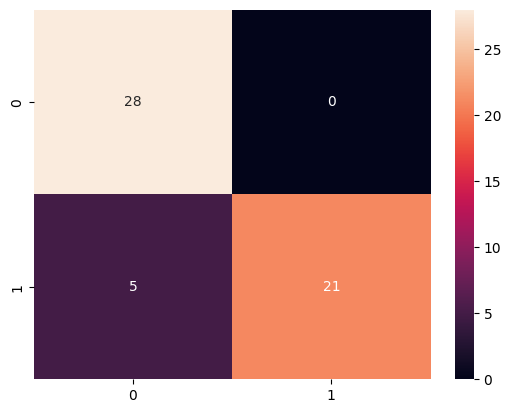

In [46]:
sns.heatmap(confusion_matrix(test_dataset.classes,prediction),annot=True)


In [48]:
from sklearn.metrics import classification_report
print(classification_report(test_dataset.classes,prediction))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        28
           1       1.00      0.81      0.89        26

    accuracy                           0.91        54
   macro avg       0.92      0.90      0.91        54
weighted avg       0.92      0.91      0.91        54



## SAVE the model


In [49]:
model_json=network.to_json()
with open('network.json','w')as json_file:
  json_file.write(model_json)

In [50]:
from keras.models import save_model
network_saved=save_model(network,'network.h5')


<ipython-input-50-e2bc33ed498c>:2: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  network_saved=save_model(network,'network.h5')


In [52]:
with open('network.json','r')as json_file:
  model_json=json_file.read()
model_json

'{"class_name": "Sequential", "config": {"name": "sequential_8", "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_input_shape": [null, 64, 64, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "conv2d_15_input"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Conv2D", "config": {"name": "conv2d_15", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 64, 64, 3], "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializers", "class_name": "Zeros", "config": {}, "registered_name": null}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": nu

In [54]:
network_load=tf.keras.models.model_from_json(model_json)
network_load.load_weights('network.h5')
network_load.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [55]:
network_load.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 6, 6, 32)         

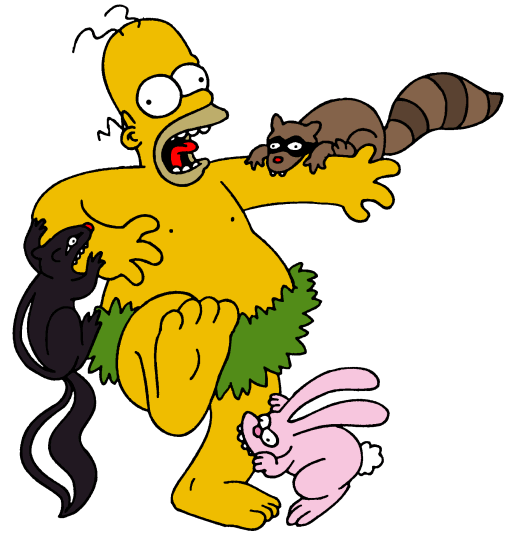

In [61]:
image=cv2.imread('/content/homer_bart_2/test_set/homer/homer15.bmp')
cv2_imshow(image)
image=cv2.resize(image,(64,64))

In [66]:
image=image /255
image

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [67]:

image=image.reshape(-1,64,64,3)
image.shape

(1, 64, 64, 3)

In [68]:
result=network_load.predict(image)
result

1/1 [==============================] - 0s 116ms/step


array([[0.10167589, 0.89832413]], dtype=float32)

In [69]:
result=np.argmax(result,axis=1)
result

array([1])

In [70]:
test_dataset.class_indices

{'bart': 0, 'homer': 1}

In [78]:
if result[0] ==1:
  print('homer')
else:
  print('bart')

homer
